# ML - Fall 2023 - Practical Homework

## Practical Homework 6 - KMeans and PCA

Student Name:

Student Number:

# Phase 0: Introduction

**In this assignment, you will develop K-means and PCA algorithm to perform data segmentation. The dataset contains behavioral variables of customers such as Balance, Purchases, etc. Your task is to make a model to segment the same customers into the clusters.**

In [3]:
# essential packages 
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore") 

# add any other packages that you may need here

In [5]:
!wget -O https://www.dropbox.com/scl/fi/vcejtazdshv8dnhbnfxc7/dataset.csv?rlkey=zauavuzjf5jzmdoqtorkmrkzk&dl=1

zsh:1: no matches found: https://www.dropbox.com/scl/fi/vcejtazdshv8dnhbnfxc7/dataset.csv?rlkey=zauavuzjf5jzmdoqtorkmrkzk


# Phase 1: Explore

## Sec 1: Load and Explore the given dataset (P1-Sec1: 25 Points)

Load the dataset and display the first 10 rows of dataset. **(P1-1-1: 2 points)**

In [6]:
df = pd.read_csv('dataset.csv')
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


Print the column names and number of data samples. **(P1-1-2: 1 points)**

In [9]:
# column name
print(f"column names: {df.columns}")
print(f"number of data samples: {len(df)}")

column names: Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')
number of data samples: 8950


Identify the columns that contain nan values. **(P1-1-3: 2 points)**

In [10]:
# columns with nan values
print(f"columns with nan values: {df.columns[df.isnull().any()].tolist()}")

columns with nan values: ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']


Fill the nan values with the median of each column. **(P1-1-4: 2 points)**

In [11]:
# fill nan with median of the column
df = df.fillna(df.median())

Find the max, min, and average of each column with numerical data. **(P1-1-5: 2 points)**

In [14]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [17]:
# make a dataframe of column names and their min max and average values
df_stats = pd.DataFrame(columns=['column_name', 'min', 'max', 'mean'])
for column in df.columns:
    # check if numeric
    if df[column].dtype in ['int64', 'float64']:
        df_stats = df_stats.append({'column_name': column, 'min': df[column].min(), 'max': df[column].max(), 'mean': df[column].mean()}, ignore_index=True)
df_stats


,column_name,min,max,mean
0,BALANCE,0.0,19043.13856,1564.474828
1,BALANCE_FREQUENCY,0.0,1.0,0.877271
2,PURCHASES,0.0,49039.57,1003.204834
3,ONEOFF_PURCHASES,0.0,40761.25,592.437371
4,INSTALLMENTS_PURCHASES,0.0,22500.0,411.067645
5,CASH_ADVANCE,0.0,47137.21176,978.871112
6,PURCHASES_FREQUENCY,0.0,1.0,0.490351
7,ONEOFF_PURCHASES_FREQUENCY,0.0,1.0,0.202458
8,PURCHASES_INSTALLMENTS_FREQUENCY,0.0,1.0,0.364437
9,CASH_ADVANCE_FREQUENCY,0.0,1.5,0.135144


Plot the Histogram of each column with numerical data. Also, show the median and average value of each column in plot. **(P1-1-6: 6 points)**

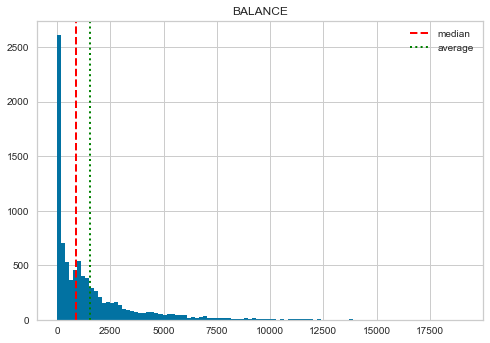

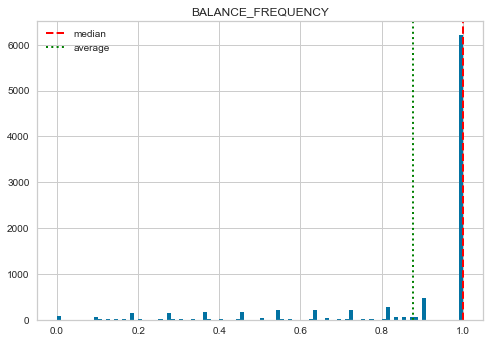

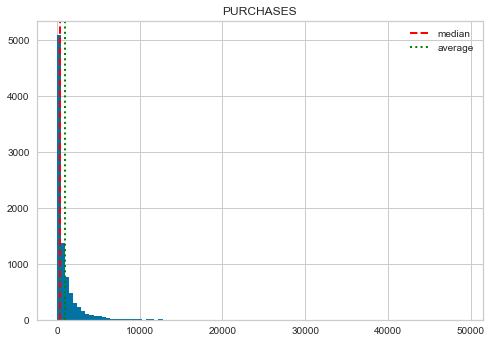

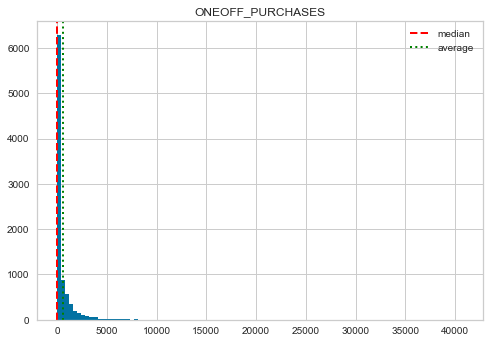

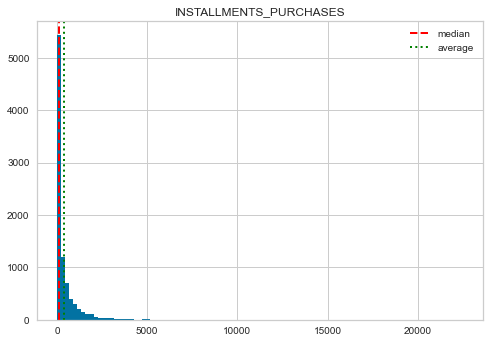

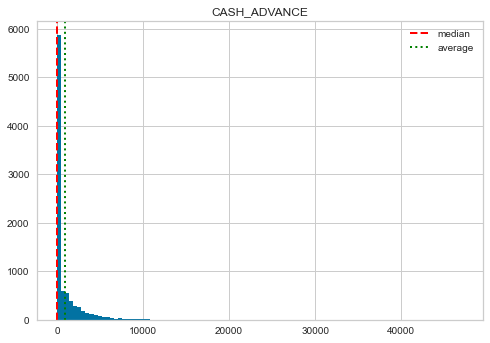

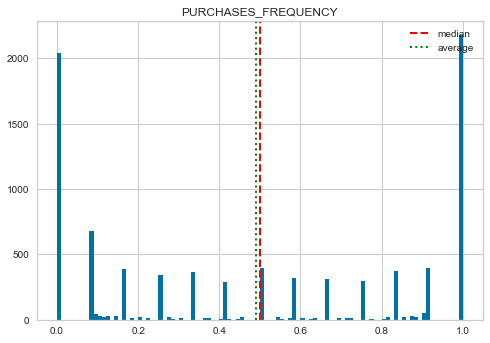

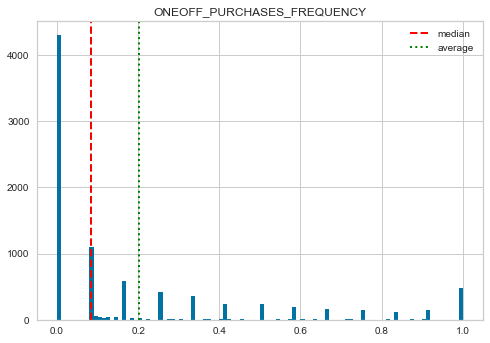

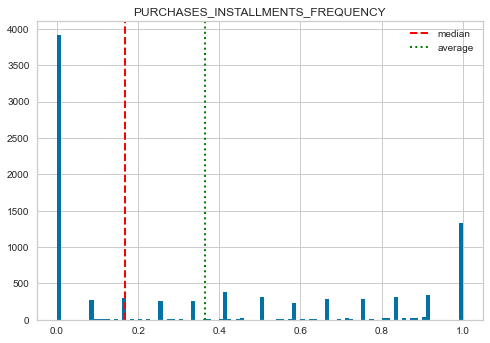

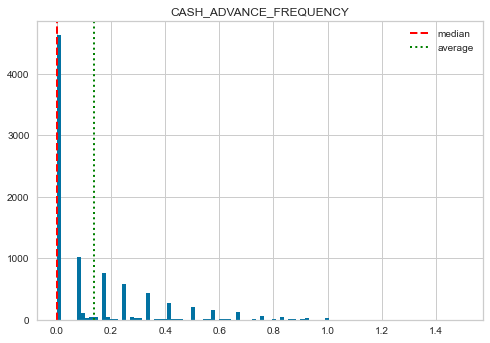

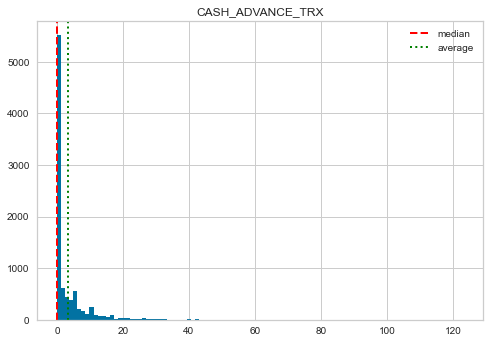

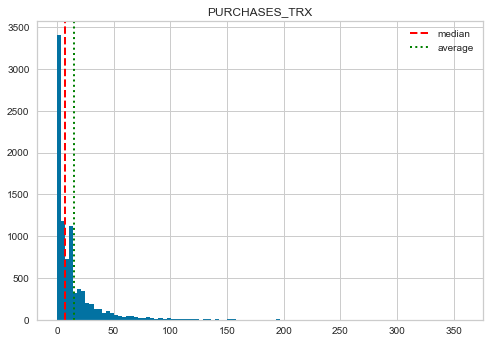

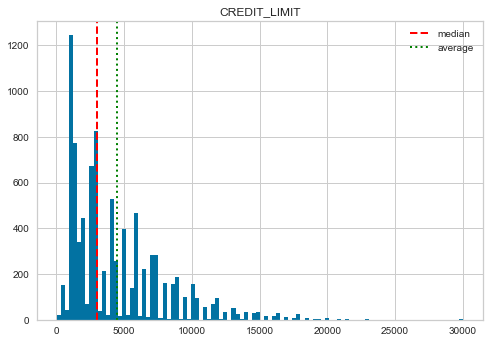

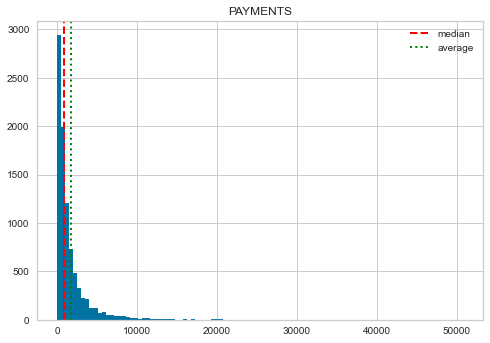

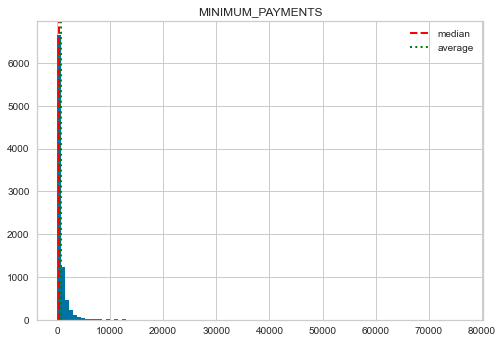

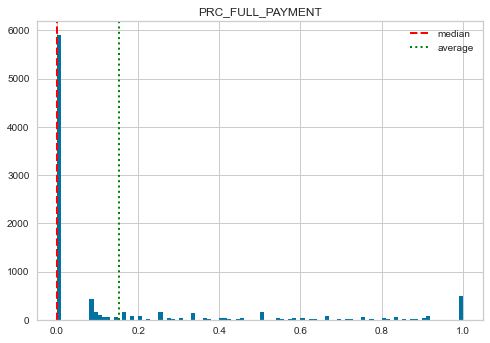

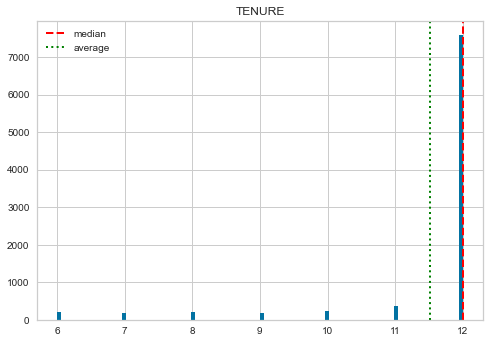

In [21]:
# histogram of each column with numerical data, also show its median and average values
for column in df.columns:
    # check if numeric
    if df[column].dtype in ['int64', 'float64']:
        plt.figure()
        plt.hist(df[column], bins=100)
        plt.axvline(df[column].median(), color='red', linestyle='dashed', linewidth=2, label='median')
        plt.axvline(df[column].mean(), color='green', linestyle='dotted', linewidth=2, label='average')
        plt.legend()
        plt.title(column)
        plt.show()

Display the box plot for each numerical column. **(P1-1-7: 5 points)**

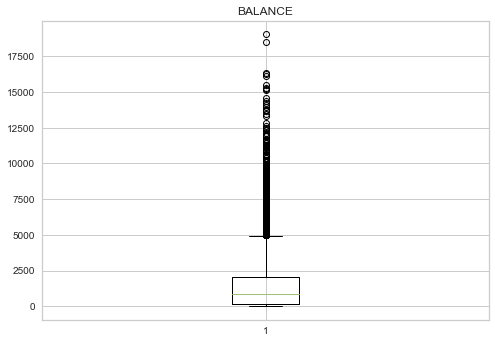

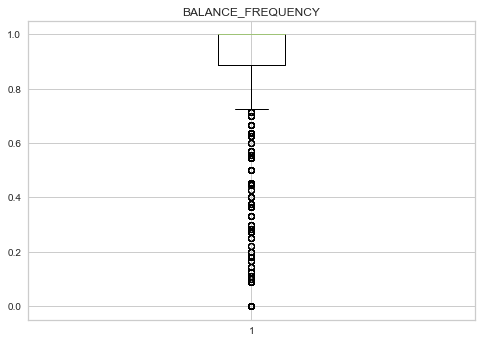

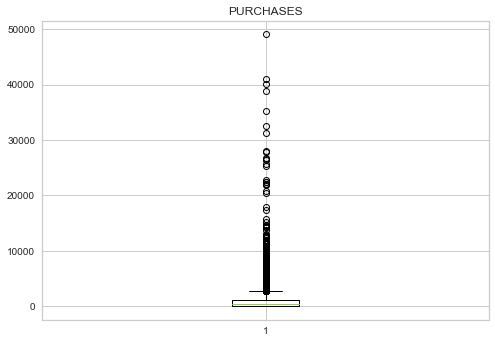

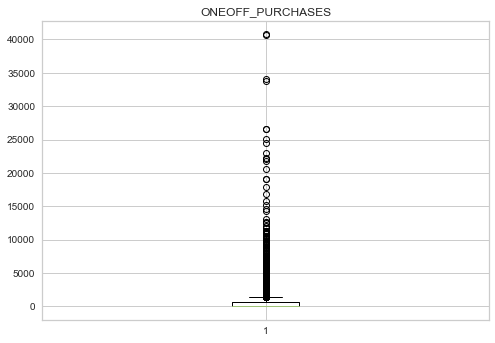

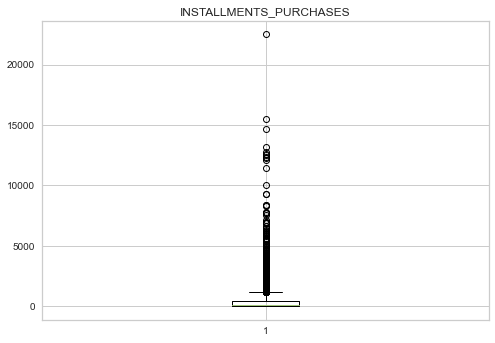

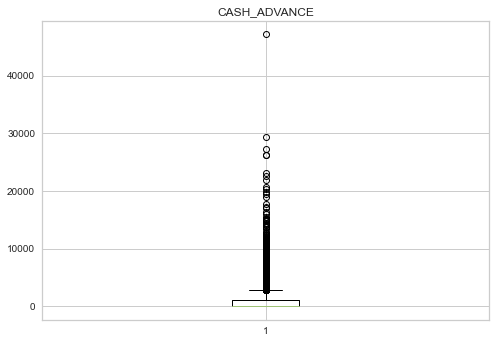

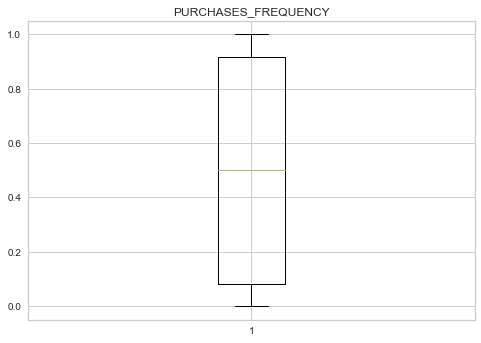

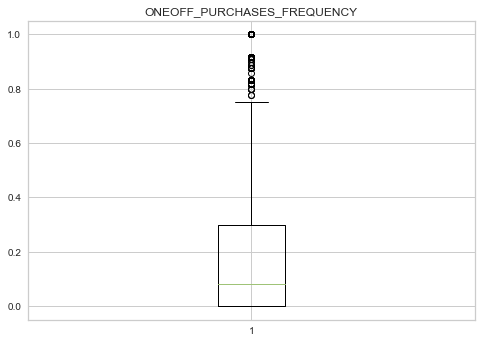

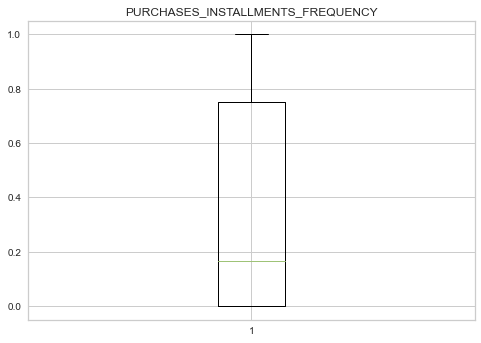

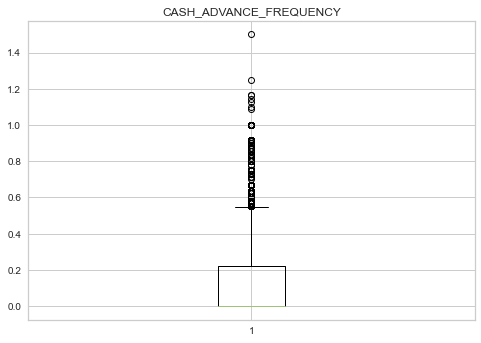

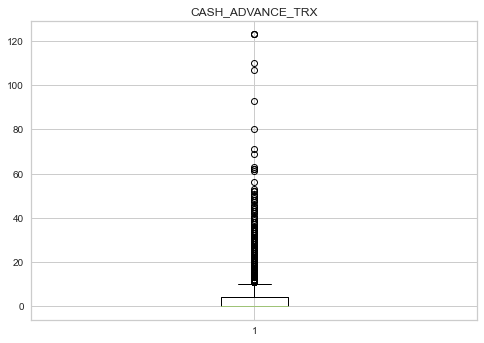

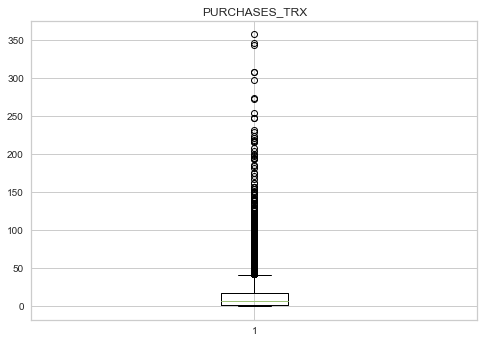

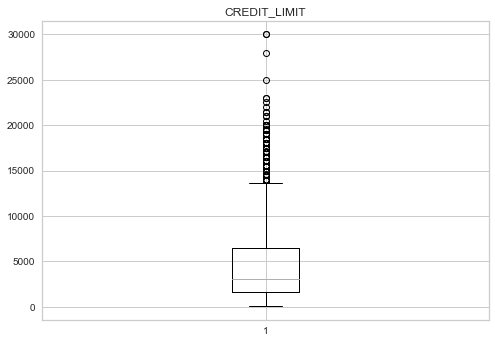

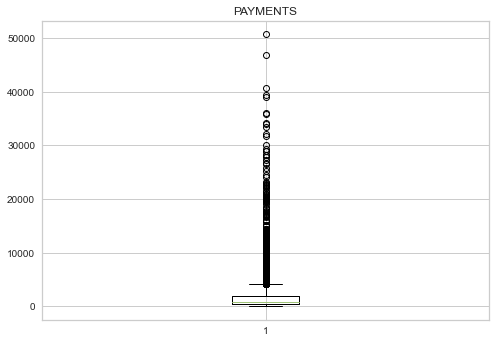

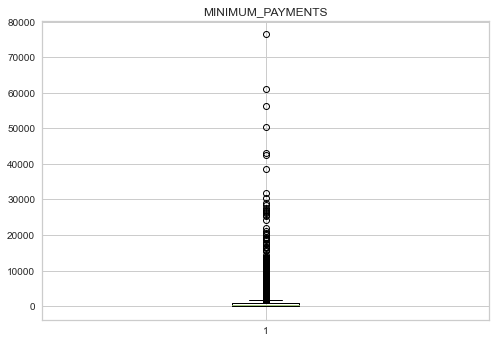

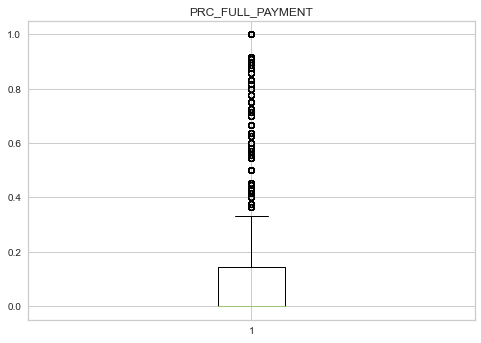

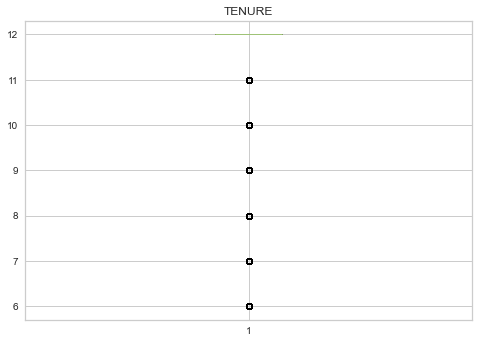

In [31]:
# box plot for each column with numerical data
for column in df.columns:
    # check if numeric
    if df[column].dtype in ['int64', 'float64']:
        plt.figure()
        plt.boxplot(df[column])
        plt.title(column)
        plt.show()


Show the correlation between columns by plotting the heatmap of correlation coefficients. **(P1-1-8: 5 points)**

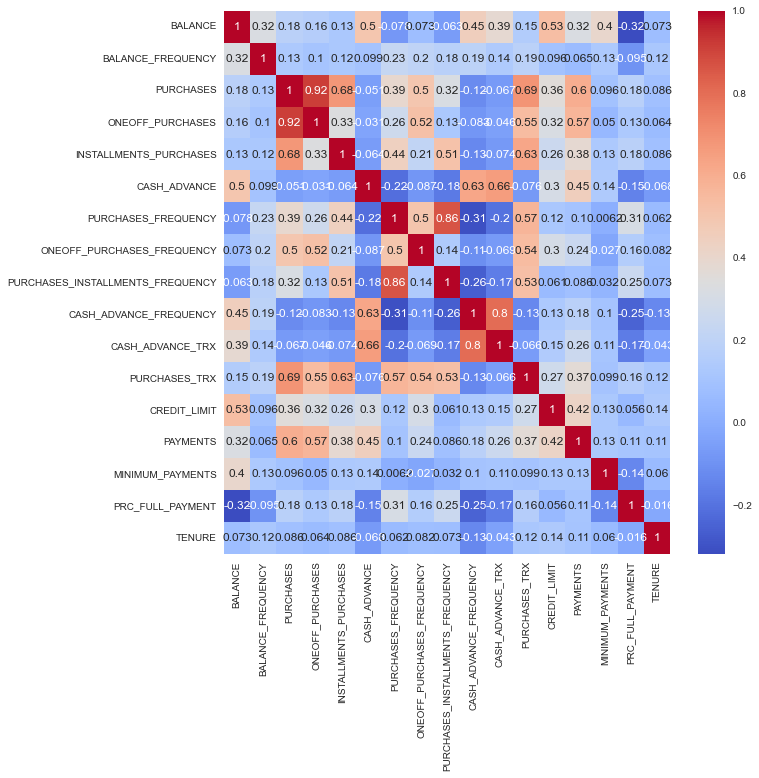

In [36]:
# heatmap correlation of columns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


# Phase 2: Preprocessing

## Sec 1: Preprocess the data **(P2-Sec1: 15 Points)**

drop the 'CUST_ID' column. **(P2-1-1: 2 points)**

In [37]:
df.drop(columns=['CUST_ID'], inplace=True)

Check for duplicated rows. If there is any duplicated row, remove them. **(P2-1-2: 6 points)**

In [39]:
# check duplicate rows
print(f"number of duplicate rows: {len(df[df.duplicated()])}")
# remove duplicate rows
df = df.drop_duplicates()

number of duplicate rows: 0


Normalize the values of each column. **(P2-1-3: 7 points)**

In [40]:
# normalize each column
for column in df.columns:
    # check if numeric
    if df[column].dtype in ['int64', 'float64']:
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [41]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.004088,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


# Phase 3: Modeling

## Sec 1: PCA and K-means with sklearn **(P3-Sec1: 40 Points)**

Use the `PCA` class from the `sklearn` library to reduce the dimensionality of the DataFrame. **(P3-1-1: 2 points)**

Follow [this link](https://www.youtube.com/watch?v=nEvKduLXFvk) to understand more about PCA (2 minutes).

In [48]:
#sklearn pca
pca = PCA(11)
pca.fit(df)
pca_data = pca.transform(df)
pca_data.shape

(8950, 11)

**Elbow Method Visualization** helps to determine the optimal number of clusters by visualizing the within-cluster sum of squares (WCSS) against the number of clusters.

Use the `plot_elbow_method function` to plot the number of clusters versus WCSS for both the main DataFrame and the one reduced using `PCA`. Then Discuss the choice of the number of components for PCA and clusters for K-means. **(P3-1-2: 10 points)**

In [58]:
np.version.version

'1.22.4'

In [44]:
def plot_elbow_method(X, max_clusters=10):
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    
    plt.plot(range(1, max_clusters + 1), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

In [49]:
plot_elbow_method(pca_data)

AttributeError: 'NoneType' object has no attribute 'split'

Use the `KMeans` class from the `sklearn.cluster` module to create clusters from the DataFrame that has been dimensionally reduced using `PCA`. **(P3-1-3: 3 points)**

Follow [this link](https://www.youtube.com/watch?v=R2e3Ls9H_fc) to understand more about KMeans (4 minutes).

In [54]:
# kmeans on pca data
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(pca_data)
y_kmeans = kmeans.predict(pca_data)


AttributeError: 'NoneType' object has no attribute 'split'

Complete the definition of the following class to implement PCA, which is capable of reducing the dimensionality. **(P3-1-4: 10 points)**

In [4]:
class CustomPCA:
    """
    Custom implementation of PCA.
    Attributes:
    -----------
    n_components : int
        Number of principal components.
    components : ndarray
        Principal components.
    """
    def init(self, n_components):
        self.n_components = n_components
        self.components = None

    def fit(self, X):
        """
        Fit the model with X.
        Parameters:
        -----------
        X : ndarray, shape (n_samples, n_features)
            Training data.
        """
        # Calculate covariance matrix
        cov = np.cov(X.T)
        # Find eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        # Sort eigenvectors based on eigenvalues
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        # Store first n_components eigenvectors in self.components
        self.components = eigenvectors[0:self.n_components]
        

    def transform(self, X):
        """
        Apply dimensionality reduction to X.
        Parameters:
        -----------
        X : ndarray, shape (n_samples, n_features)
            Data to transform.
        Returns:
        --------
        X_transformed : ndarray, shape (n_samples, n_components)
            Transformed data.
        """
        # Project data
        X_transformed = np.dot(X, self.components.T)

Complete defining the class below to implement `KMeans`, an algorithm designed for clustering. **(P3-1-5: 15 points)**

In [5]:
class CustomKMeans:
    """
    Custom implementation of K-means clustering.
    Attributes:
    -----------
    n_clusters : int
        Number of clusters.
    centroids : ndarray
        Coordinates of cluster centers.
    """
    def init(self, n_clusters):
        self.n_clusters = n_clusters
        self.centroids = None

    def assign_points(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)
    
    def calculate_centroids(self, X, labels):
        centroids = []
        for i in range(self.n_clusters):
            centroids.append(np.mean(X[labels == i], axis=0))
        return np.array(centroids)

    def fit_predict(self, X):
        """
        Compute k-means clustering.
        Parameters:
        -----------
        X : ndarray, shape (n_samples, n_features)
            Training instances to cluster.
        Returns:
        --------
        labels : ndarray, shape (n_samples,)
            Index of the cluster each sample belongs to.
        """
        # Initialize centroids
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        # Repeat until convergence:
            # Assign points to the nearest centroid
            # Recalculate the centroids
        while True:
            # Assign points to the nearest centroid
            labels = self.assign_points(X)
            # Recalculate the centroids
            new_centroids = self.calculate_centroids(X, labels)
            # Check for convergence
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids
        # Return labels
        return labels

## Sec 2: Fitting implemented Kmeans **(P3-Sec2: 5 Points)**

Use your implemented `CustomPCA` to reduce the dimensionality of the DataFrame. **(P3-2-1: 3 points)**

In [ ]:
# custom pca
custom_pca = CustomPCA(11)
custom_pca.fit(df)
custom_pca_data = custom_pca.transform(df)

Apply the `CustomKMeans` implementation you created to perform clustering on the DataFrame. **(P3-2-2: 2 points)**

In [ ]:
# custom kmeans
custom_kmeans = CustomKMeans()
custom_kmeans.init(3)
custom_kmeans_labels = custom_kmeans.fit_predict(custom_pca_data)


# Phase 4: Analyzing

## Sec 1: Visualizing and Comparing **(P4-Sec1: 5 Points)**

Visualize and compare the clustering results from the sklearn library with those from your custom clustering implementation. **(P4-1-1: 5 points)**

In [ ]:
# visualize and compare clusters
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(pca_data[:,0], pca_data[:,1], c=y_kmeans, cmap='rainbow')
plt.title('sklearn kmeans')
plt.subplot(1,2,2)
plt.scatter(custom_pca_data[:,0], custom_pca_data[:,1], c=custom_kmeans_labels, cmap='rainbow')
plt.title('custom kmeans')
plt.show()

## Sec 2: Silhouette Analysis **(P4-Sec2: 10 Points)**

**Silhouette Analysis** involves calculating and plotting the silhouette coefficients, which measure how similar each point is to its own cluster compared to other clusters. The closer these coefficients are to +1, the better the clustering.

Calculate the silhouette scores for each sample in the dataset using `silhouette_samples` and the average silhouette score using `silhouette_score`. Then, visualize these scores in a plot for each cluster for both results from the sklearn library and those from your custom clustering implementation.  **(P4-2-1: 10 points)**

In [ ]:
# use silhouette_samples for each sample in dataset and silhouette_score for the whole dataset
# sklearn kmeans
print(f"silhouette_score: {silhouette_score(pca_data, y_kmeans)}")
print(f"silhouette_samples: {silhouette_samples(pca_data, y_kmeans)}")
# custom kmeans
print(f"silhouette_score: {silhouette_score(custom_pca_data, custom_kmeans_labels)}")
print(f"silhouette_samples: {silhouette_samples(custom_pca_data, custom_kmeans_labels)}")
# visualiza the score for each cluster for both resluts (sklearn and custom)
# sklearn kmeans
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(pca_data)
visualizer.show()
# plot the sample scores
plt.figure(figsize=(10,5))
plt.scatter(pca_data[:,0], pca_data[:,1], c=silhouette_samples(pca_data, y_kmeans), cmap='rainbow')
plt.title('sklearn kmeans')

